In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('SaYoPillow.csv')
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleep_hour,heart_rate,stress_level
0,93.80,22.928,89.160,16.600,89.424,88.76,2.696,58.88,3
1,91.64,19.952,95.344,15.880,93.608,81.68,3.824,58.72,3
2,60.00,16.224,98.664,10.000,92.624,101.36,5.816,55.40,1
3,85.76,25.744,93.072,13.920,89.040,98.64,3.176,69.32,3
4,48.12,19.824,98.712,6.496,95.864,88.12,1.824,50.68,0


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleep_hour        630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleep_hour          0
heart_rate          0
stress_level        0
dtype: int64

In [3]:
df[df.duplicated()]

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleep_hour,heart_rate,stress_level


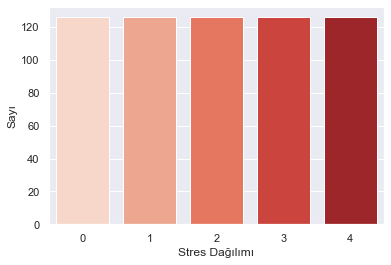

In [4]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(x='stress_level', data=df, palette='Reds')
plt.xlabel("Stres Dağılımı")
plt.ylabel("Sayı")
plt.show()

In [5]:
cont = []
for feature in df.columns:
    if feature == 'stress_level':
        label = feature
    else:
        cont.append(feature)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
scale.fit(df[cont])
scaled_cont = scale.transform(df[cont])
scaled_cont = pd.DataFrame(data=scaled_cont, columns=['snoring_rate','respiration_rate','body_temperature','limb_movement','blood_oxygen','eye_movement','sleep_hour','heart_rate'])
scaled_cont.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleep_hour,heart_rate
0,0.887273,0.494857,0.297143,0.840000,0.494933,0.639111,0.299556,0.253714
1,0.848000,0.282286,0.738857,0.792000,0.773867,0.481778,0.424889,0.249143
2,0.272727,0.016000,0.976000,0.400000,0.708267,0.919111,0.646222,0.154286
3,0.741091,0.696000,0.576571,0.661333,0.469333,0.858667,0.352889,0.552000
4,0.056727,0.273143,0.979429,0.166400,0.924267,0.624889,0.202667,0.019429


In [7]:
from sklearn.model_selection import train_test_split
x = scaled_cont
y = df[label]
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.20)
sonuc = []
algo = ["Random Forest","KNN","Naive Bayes"]

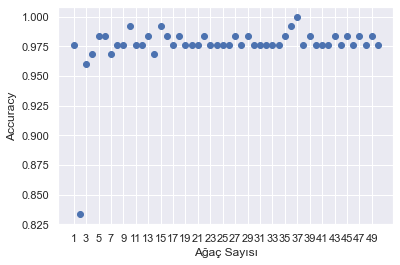

Random Forest Metrics: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.93      0.96        28
           2       0.97      1.00      0.99        34
           3       1.00      0.94      0.97        16
           4       0.96      1.00      0.98        27

    accuracy                           0.98       126
   macro avg       0.98      0.97      0.97       126
weighted avg       0.98      0.98      0.98       126

Random Forest Confusion Matrix: 
[[21  0  0  0  0]
 [ 1 26  1  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 15  1]
 [ 0  0  0  0 27]]
Accuracy: 0.976190
Precision: 0.978052
Recall: 0.973214
Max Accuracy Ağaç Sayısı: 37


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from copy import deepcopy
max = 0
number = 0
max_x_train = ()
max_y_train = ()
max_x_test = ()
max_y_test = ()

n_range = range(1,51)
score = []

for n in n_range:
    rf_model = RandomForestClassifier(n_estimators=n) #, max_depth=2)
    rf_model.fit(x_train, y_train)
    score.append(rf_model.score(x_test, y_test))
    prediction = rf_model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    
    if accuracy > max:
        max = accuracy
        max_rf_model = deepcopy(rf_model)
        max_x_train = deepcopy(x_train)
        max_y_train = deepcopy(y_train)
        max_x_test = deepcopy(x_test)
        max_y_test = deepcopy(y_test)
        number = n

plt.figure()
plt.xlabel('Ağaç Sayısı')
plt.ylabel('Accuracy')
plt.scatter(n_range, score)
plt.xticks(range(1,51,2))
plt.show()

print("Random Forest Metrics: ")
print(metrics.classification_report(max_y_test, prediction))

print("Random Forest Confusion Matrix: ")
prediction = rf_model.predict(max_x_test)
print(confusion_matrix(max_y_test, prediction))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(max_y_test, prediction)
sonuc.append(accuracy)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(max_y_test, prediction, average = 'macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(max_y_test, prediction, average = 'macro')
print('Recall: %f' % recall)

print('Max Accuracy Ağaç Sayısı: %d' % number)

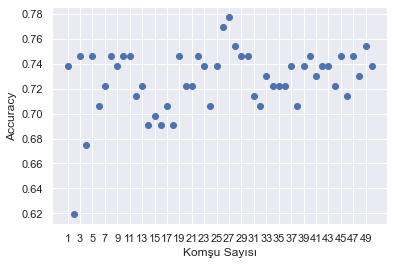

KNN Metrics: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.71      0.79      0.75        28
           2       0.89      0.71      0.79        34
           3       0.56      0.88      0.68        16
           4       0.95      0.74      0.83        27

    accuracy                           0.78       126
   macro avg       0.79      0.79      0.78       126
weighted avg       0.81      0.78      0.78       126

KNN Confusion Matrix:
[[18  3  0  0  0]
 [ 4 22  2  0  0]
 [ 0  6 24  4  0]
 [ 0  0  1 14  1]
 [ 0  0  0  7 20]]
Accuracy: 0.777778
Precision: 0.785826
Recall: 0.792896
Max Accuracy Komşu Sayısı: 27


In [15]:
from sklearn.neighbors import KNeighborsClassifier

max = 0
number = 0
max_x_train = ()
max_y_train = ()
max_x_test = ()
max_y_test = ()

k_range = range(1,51)
kscore = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    kscore.append(knn.score(x_test, y_test))
    
    prediction = knn.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    
    if accuracy > max:
        max = accuracy
        max_knn = deepcopy(knn)
        max_x_train = deepcopy(x_train)
        max_y_train = deepcopy(y_train)
        max_x_test = deepcopy(x_test)
        max_y_test = deepcopy(y_test)
        number = k

plt.figure()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Accuracy')
plt.scatter(k_range, kscore)
plt.xticks(range(1,51,2))
plt.show()


prediction = max_knn.predict(max_x_test)

print("KNN Metrics: ")
print(metrics.classification_report(max_y_test, prediction))

print("KNN Confusion Matrix:")
print(confusion_matrix(max_y_test, prediction))

accuracy = accuracy_score(max_y_test, prediction)
sonuc.append(accuracy)
print("Accuracy: %f" % accuracy)

precision = precision_score(max_y_test, prediction, average = 'macro')
print('Precision: %f' % precision)

recall = recall_score(max_y_test, prediction, average = 'macro')
print('Recall: %f' % recall)

print("Max Accuracy Komşu Sayısı: %d" % number)

In [10]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
print("Train Accuracy:")
nb_model.score(x_train, y_train)

Train Accuracy:


0.9841269841269841

In [11]:
print("Test Accuracy:")
nb_model.score(x_test, y_test)

Test Accuracy:


0.9920634920634921

In [12]:
prediction = nb_model.predict(x_test)

print("Naive Bayes Metrics: ")
print(metrics.classification_report(max_y_test, prediction))

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, prediction))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, prediction)
sonuc.append(accuracy)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, prediction, average = 'macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction, average = 'macro')
print('Recall: %f' % recall)

Naive Bayes Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        34
           3       1.00      0.94      0.97        16
           4       0.96      1.00      0.98        27

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Naive Bayes Confusion Matrix:
[[21  0  0  0  0]
 [ 0 28  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 15  1]
 [ 0  0  0  0 27]]
Accuracy: 0.992063
Precision: 0.992857
Recall: 0.987500


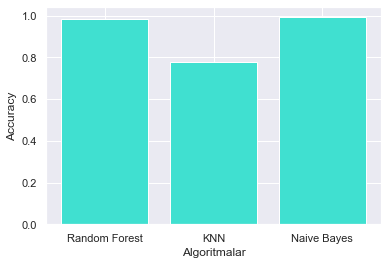

In [13]:
plt.bar(algo,sonuc,color="turquoise")
plt.xlabel('Algoritmalar')
plt.ylabel('Accuracy')
plt.show()